In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import pandasql as psql

In [2]:
pred=pd.read_csv(r'C:\Users\nayak\OneDrive\Desktop\Intership Project\training data.csv',header=0)
pred_bk = pred.copy()
pred.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,12/16/2016,Friday,Local,1,0.0,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,2/12/2015,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,12/6/2016,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,5/5/2016,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,10/27/2015,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [3]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [4]:
pred.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [5]:
pred['marital_status'].value_counts()

1.0    12824
0.0     5169
Name: marital_status, dtype: int64

In [6]:
pred['claim_est_payout'].value_counts()

7530.940993    1
1280.785002    1
9019.780029    1
6091.602399    1
5291.709777    1
              ..
3895.307825    1
5548.337594    1
2910.028911    1
4046.375441    1
5166.915270    1
Name: claim_est_payout, Length: 17981, dtype: int64

In [7]:
pred['witness_present_ind'].value_counts()

0.0    13709
1.0     4157
Name: witness_present_ind, dtype: int64

In [8]:
pred.shape

(17998, 25)

In [9]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
pred['witness_present_ind']=si.fit_transform(pred[['witness_present_ind']])
pred['marital_status']=si.fit_transform(pred[['marital_status']])
pred['marital_status']=pred['marital_status'].astype(int)
pred['witness_present_ind']=pred['witness_present_ind'].astype(int)

In [10]:
from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors=2)
pred['claim_est_payout'] = ki.fit_transform(pred[['claim_est_payout']])
pred['claim_est_payout']=pred['claim_est_payout'].astype(int)

In [11]:
pred.isnull().sum()

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             8
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64

In [12]:
pred['age_of_vehicle'].value_counts()

4.0     3111
5.0     3101
6.0     2644
3.0     2561
7.0     1864
2.0     1524
8.0     1178
9.0      668
1.0      617
10.0     333
11.0     161
0.0      121
12.0      63
13.0      28
14.0      12
15.0       3
16.0       1
Name: age_of_vehicle, dtype: int64

In [13]:
from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors=2)
pred['age_of_vehicle'] = ki.fit_transform(pred[['age_of_vehicle']])
pred['age_of_vehicle']=pred['age_of_vehicle'].astype(int)

In [14]:
pred.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1,85,38301,1,1,Rent,80006,12/16/2016,Friday,Local,1,0,74,Broker,0,7530,9,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0,75,30445,0,1,Rent,15021,2/12/2015,Thursday,Highway,1,1,79,Online,0,2966,4,Large,29429.45218,white,28691.96422,0
2,4,49,F,0,87,38923,0,1,Own,20158,12/6/2016,Tuesday,Local,0,0,0,Broker,0,6283,3,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1,58,40605,1,0,Own,15024,5/5/2016,Thursday,Local,3,0,99,Broker,1,6169,4,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1,95,36380,1,0,Rent,50034,10/27/2015,Tuesday,Highway,0,1,7,Broker,0,4541,7,Medium,38060.21122,gray,25876.56319,0


In [15]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17998 non-null  int32  
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [16]:
pred[pred.duplicated()]

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud


In [17]:
pred['gender'].value_counts()

M    9414
F    8584
Name: gender, dtype: int64

In [18]:
pred['gender']= pred['gender'].replace(['M','F'],[0,1])

In [19]:
pred['living_status'].value_counts()

Own     9969
Rent    8029
Name: living_status, dtype: int64

In [20]:
pred['living_status']= pred['living_status'].replace(['Own','Rent'],[0,1])

In [21]:
pred['accident_site'].value_counts()

Local          8768
Parking Lot    5472
Highway        3758
Name: accident_site, dtype: int64

In [22]:
pred['channel'].value_counts()

Broker    9633
Phone     5771
Online    2594
Name: channel, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

pred['accident_site']=LE.fit_transform(pred['accident_site'])

In [24]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

pred['channel']=LE.fit_transform(pred['channel'])

In [25]:
pred['claim_day_of_week'].value_counts()

Saturday     2630
Sunday       2629
Thursday     2571
Monday       2570
Friday       2554
Tuesday      2530
Wednesday    2514
Name: claim_day_of_week, dtype: int64

In [26]:
pred['vehicle_category'].value_counts()

Compact    6063
Large      5986
Medium     5949
Name: vehicle_category, dtype: int64

In [27]:
pred['vehicle_color'].value_counts()

black     2620
silver    2619
white     2585
red       2565
blue      2548
gray      2546
other     2515
Name: vehicle_color, dtype: int64

In [28]:
pred['claim_day_of_week']=pred['claim_day_of_week'].map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})

In [29]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

pred['vehicle_category']=LE.fit_transform(pred['vehicle_category'])

In [30]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

pred['vehicle_color']=LE.fit_transform(pred['vehicle_color'])

In [31]:
pred['age_of_driver'].describe()

count    17998.000000
mean        43.695466
std         11.959819
min         18.000000
25%         35.000000
50%         43.000000
75%         51.000000
max        229.000000
Name: age_of_driver, dtype: float64

In [32]:
pred.drop(pred.index[(pred['age_of_driver']== 200)],axis=0,inplace=True)
pred.drop(pred.index[(pred['age_of_driver']== 133)],axis=0,inplace=True)
pred.drop(pred.index[(pred['age_of_driver']== 100)],axis=0,inplace=True)
pred.drop(pred.index[(pred['age_of_driver']== 229)],axis=0,inplace=True)
pred.drop(pred.index[(pred['age_of_driver']== 113)],axis=0,inplace=True)

In [33]:
pred.reset_index(drop=True)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,0,1,85,38301,1,1,1,80006,12/16/2016,4,1,1,0,74,0,0,7530,9,0,12885.452350,6,16161.33381,0
1,3,21,1,0,75,30445,0,1,1,15021,2/12/2015,3,0,1,1,79,1,0,2966,4,1,29429.452180,6,28691.96422,0
2,4,49,1,0,87,38923,0,1,0,20158,12/6/2016,1,1,0,0,0,0,0,6283,3,0,21701.181950,6,22090.94758,1
3,5,58,1,1,58,40605,1,0,0,15024,5/5/2016,3,1,3,0,99,0,1,6169,4,2,13198.273440,3,38329.58106,1
4,6,38,0,1,95,36380,1,0,1,50034,10/27/2015,1,0,0,1,7,0,0,4541,7,2,38060.211220,2,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17988,29993,69,0,1,93,42338,1,0,0,15012,3/28/2015,5,1,0,0,99,0,0,4806,6,2,32144.571850,0,16868.53410,0
17989,29996,35,1,0,22,35579,1,1,0,20111,1/5/2015,0,1,1,0,94,2,1,4089,3,2,9468.510601,1,31500.99689,1
17990,29997,27,1,1,81,32953,0,1,1,15012,9/10/2016,5,1,2,0,1,1,1,2225,5,2,64974.369590,0,44536.25506,0
17991,29999,52,1,1,86,39519,1,0,0,15026,12/25/2015,4,0,1,1,75,0,1,9560,3,0,24983.268110,6,50093.75959,0


In [34]:
pred['age_of_driver'].value_counts()

44    638
41    632
40    632
42    609
43    605
     ... 
98      1
95      1
90      1
93      1
99      1
Name: age_of_driver, Length: 82, dtype: int64

In [35]:
pred['fraud'].value_counts()

0    15178
1     2815
Name: fraud, dtype: int64

In [36]:
exi=pred.fraud.value_counts()
print('Class 0',exi[0])
print('Class 1',exi[1])
print('Properties',round(exi[0]/exi[1],2),":1")
print('Total Bank Records',len(pred))

Class 0 15178
Class 1 2815
Properties 5.39 :1
Total Bank Records 17993


In [37]:
pred['claim_date'].value_counts()

9/14/2016    39
2/20/2016    38
4/20/2015    37
1/23/2015    36
1/18/2015    36
             ..
9/16/2016    13
8/5/2015     13
7/16/2015    13
6/29/2015    13
2/24/2016     9
Name: claim_date, Length: 731, dtype: int64

In [38]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17993 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17993 non-null  int64  
 1   age_of_driver            17993 non-null  int64  
 2   gender                   17993 non-null  int64  
 3   marital_status           17993 non-null  int32  
 4   safty_rating             17993 non-null  int64  
 5   annual_income            17993 non-null  int64  
 6   high_education_ind       17993 non-null  int64  
 7   address_change_ind       17993 non-null  int64  
 8   living_status            17993 non-null  int64  
 9   zip_code                 17993 non-null  int64  
 10  claim_date               17993 non-null  object 
 11  claim_day_of_week        17993 non-null  int64  
 12  accident_site            17993 non-null  int32  
 13  past_num_of_claims       17993 non-null  int64  
 14  witness_present_ind   

In [39]:
del pred['claim_number']
del pred['zip_code']
del pred['claim_date']

In [40]:
pred

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,0,1,85,38301,1,1,1,4,1,1,0,74,0,0,7530,9,0,12885.452350,6,16161.33381,0
1,21,1,0,75,30445,0,1,1,3,0,1,1,79,1,0,2966,4,1,29429.452180,6,28691.96422,0
2,49,1,0,87,38923,0,1,0,1,1,0,0,0,0,0,6283,3,0,21701.181950,6,22090.94758,1
3,58,1,1,58,40605,1,0,0,3,1,3,0,99,0,1,6169,4,2,13198.273440,3,38329.58106,1
4,38,0,1,95,36380,1,0,1,1,0,0,1,7,0,0,4541,7,2,38060.211220,2,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,0,1,93,42338,1,0,0,5,1,0,0,99,0,0,4806,6,2,32144.571850,0,16868.53410,0
17994,35,1,0,22,35579,1,1,0,0,1,1,0,94,2,1,4089,3,2,9468.510601,1,31500.99689,1
17995,27,1,1,81,32953,0,1,1,5,1,2,0,1,1,1,2225,5,2,64974.369590,0,44536.25506,0
17996,52,1,1,86,39519,1,0,0,4,0,1,1,75,0,1,9560,3,0,24983.268110,6,50093.75959,0


In [41]:
IndepVar=[]
for col in pred.columns:
    if col!='fraud':
        IndepVar.append(col)
TargetVar='fraud'

x=pred[IndepVar]
y=pred[TargetVar]

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12595, 21), (5398, 21), (12595,), (5398,))

In [43]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0,1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [44]:
res=pd.read_csv(r'C:\Users\nayak\OneDrive\Desktop\Intership Project\EMResult.csv',header=0)
res.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [45]:
KNN_Results = pd.read_csv(r'C:\Users\nayak\OneDrive\Desktop\Intership Project\KNN_Results.csv',header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 181  628]
 [ 634 3955]]
Outcome values : 
 181 628 634 3955
Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.22      0.22       809
           0       0.86      0.86      0.86      4589

    accuracy                           0.77      5398
   macro avg       0.54      0.54      0.54      5398
weighted avg       0.77      0.77      0.77      5398

Accuracy : 76.6 %
Precision : 22.2 %
Recall : 22.4 %
F1 Score : 0.223
Specificity or True Negative Rate : 86.2 %
Balanced Accuracy : 54.3 %
MCC : 0.085
roc_auc_score: 0.543


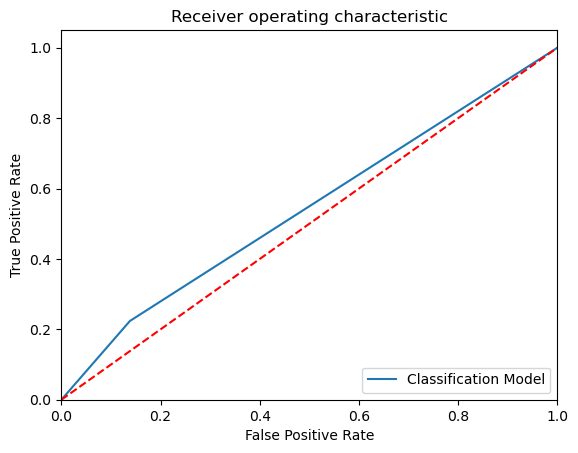

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  46  763]
 [  98 4491]]
Outcome values : 
 46 763 98 4491
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.06      0.10       809
           0       0.85      0.98      0.91      4589

    accuracy                           0.84      5398
   macro avg       0.59      0.52      0.50      5398
weighted avg       0.77      0.84      0.79      5398

Accuracy : 84.0 %
Precision : 31.9 %
Recall : 5.7 %
F1 Score : 0.097
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 51.8 %
MCC : 0.079
roc_auc_score: 0.518


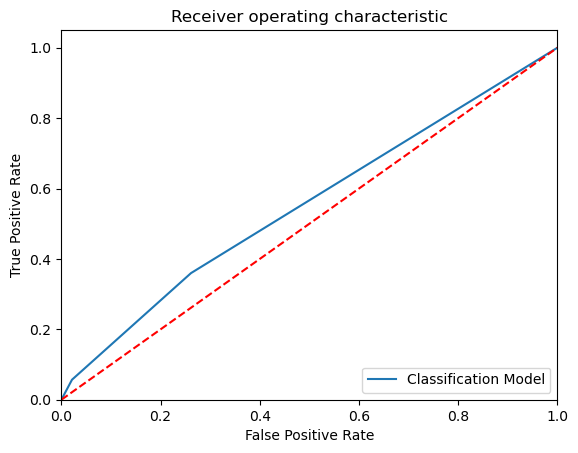

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[  99  710]
 [ 299 4290]]
Outcome values : 
 99 710 299 4290
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.12      0.16       809
           0       0.86      0.93      0.89      4589

    accuracy                           0.81      5398
   macro avg       0.55      0.53      0.53      5398
weighted avg       0.77      0.81      0.79      5398

Accuracy : 81.3 %
Precision : 24.9 %
Recall : 12.2 %
F1 Score : 0.164
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 52.8 %
MCC : 0.078
roc_auc_score: 0.529


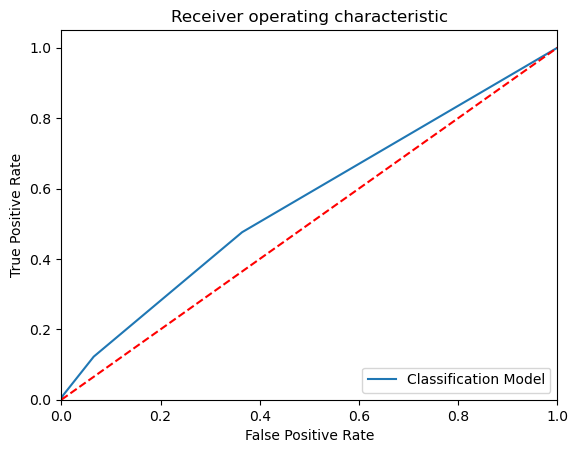

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  23  786]
 [  71 4518]]
Outcome values : 
 23 786 71 4518
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.03      0.05       809
           0       0.85      0.98      0.91      4589

    accuracy                           0.84      5398
   macro avg       0.55      0.51      0.48      5398
weighted avg       0.76      0.84      0.78      5398

Accuracy : 84.1 %
Precision : 24.5 %
Recall : 2.8 %
F1 Score : 0.051
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 50.6 %
MCC : 0.035
roc_auc_score: 0.506


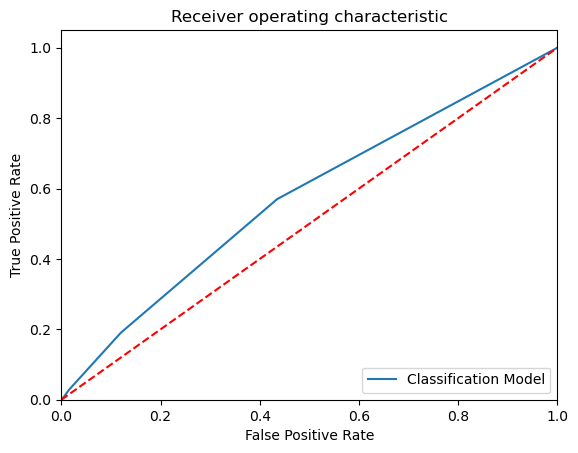

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  57  752]
 [ 185 4404]]
Outcome values : 
 57 752 185 4404
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.07      0.11       809
           0       0.85      0.96      0.90      4589

    accuracy                           0.83      5398
   macro avg       0.54      0.52      0.51      5398
weighted avg       0.76      0.83      0.78      5398

Accuracy : 82.6 %
Precision : 23.6 %
Recall : 7.0 %
F1 Score : 0.108
Specificity or True Negative Rate : 96.0 %
Balanced Accuracy : 51.5 %
MCC : 0.052
roc_auc_score: 0.515


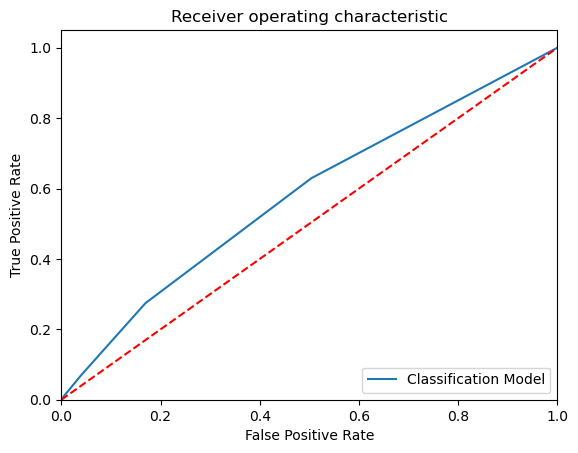

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  24  785]
 [  47 4542]]
Outcome values : 
 24 785 47 4542
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.03      0.05       809
           0       0.85      0.99      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.60      0.51      0.49      5398
weighted avg       0.78      0.85      0.79      5398

Accuracy : 84.6 %
Precision : 33.8 %
Recall : 3.0 %
F1 Score : 0.055
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 51.0 %
MCC : 0.061
roc_auc_score: 0.51


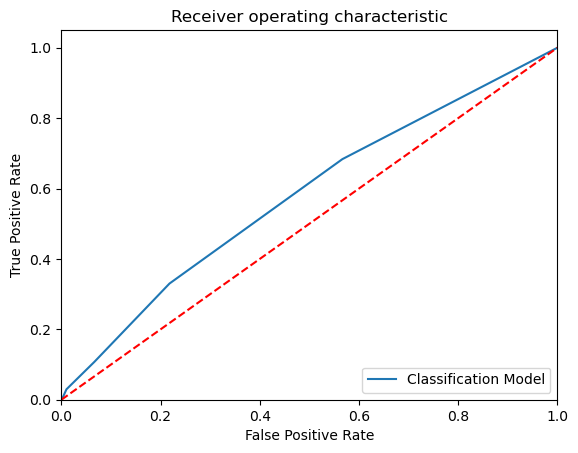

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[  38  771]
 [  95 4494]]
Outcome values : 
 38 771 95 4494
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.05      0.08       809
           0       0.85      0.98      0.91      4589

    accuracy                           0.84      5398
   macro avg       0.57      0.51      0.50      5398
weighted avg       0.77      0.84      0.79      5398

Accuracy : 84.0 %
Precision : 28.6 %
Recall : 4.7 %
F1 Score : 0.081
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 51.3 %
MCC : 0.06
roc_auc_score: 0.513


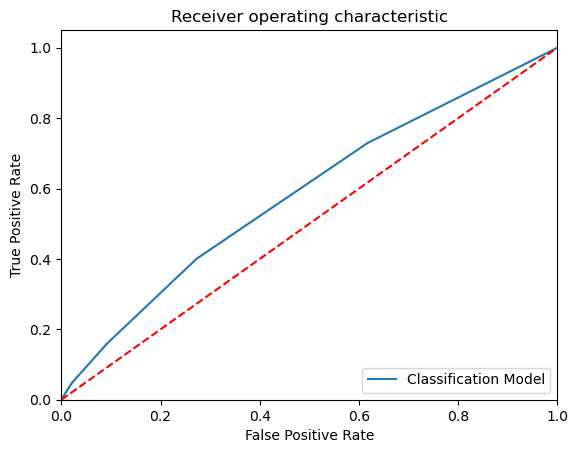

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  18  791]
 [  30 4559]]
Outcome values : 
 18 791 30 4559
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.02      0.04       809
           0       0.85      0.99      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.61      0.51      0.48      5398
weighted avg       0.78      0.85      0.79      5398

Accuracy : 84.8 %
Precision : 37.5 %
Recall : 2.2 %
F1 Score : 0.042
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 50.7 %
MCC : 0.06
roc_auc_score: 0.508


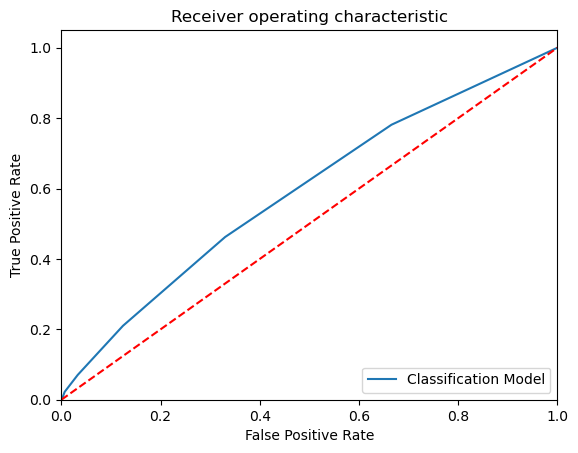

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[  26  783]
 [  58 4531]]
Outcome values : 
 26 783 58 4531
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.03      0.06       809
           0       0.85      0.99      0.92      4589

    accuracy                           0.84      5398
   macro avg       0.58      0.51      0.49      5398
weighted avg       0.77      0.84      0.79      5398

Accuracy : 84.4 %
Precision : 31.0 %
Recall : 3.2 %
F1 Score : 0.058
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 50.9 %
MCC : 0.056
roc_auc_score: 0.51


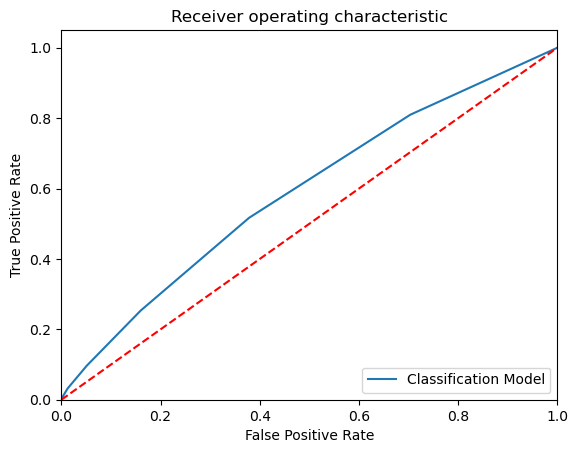

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[  12  797]
 [  25 4564]]
Outcome values : 
 12 797 25 4564
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.01      0.03       809
           0       0.85      0.99      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.59      0.50      0.47      5398
weighted avg       0.77      0.85      0.78      5398

Accuracy : 84.8 %
Precision : 32.4 %
Recall : 1.5 %
F1 Score : 0.028
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 50.5 %
MCC : 0.041
roc_auc_score: 0.505


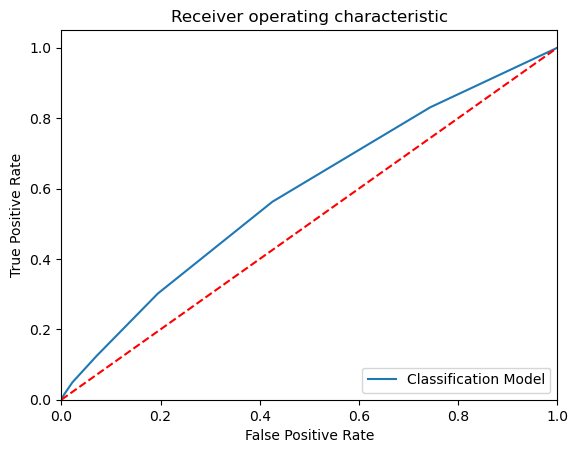

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[  19  790]
 [  40 4549]]
Outcome values : 
 19 790 40 4549
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.02      0.04       809
           0       0.85      0.99      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.59      0.51      0.48      5398
weighted avg       0.77      0.85      0.79      5398

Accuracy : 84.6 %
Precision : 32.2 %
Recall : 2.3 %
F1 Score : 0.044
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 50.7 %
MCC : 0.051
roc_auc_score: 0.507


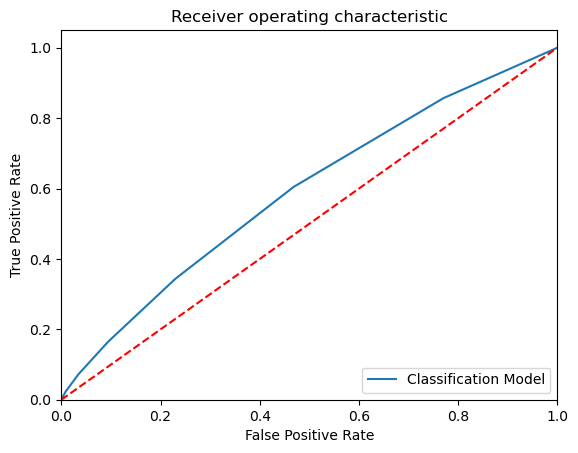

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[  11  798]
 [  17 4572]]
Outcome values : 
 11 798 17 4572
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.01      0.03       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.62      0.50      0.47      5398
weighted avg       0.78      0.85      0.78      5398

Accuracy : 84.9 %
Precision : 39.3 %
Recall : 1.4 %
F1 Score : 0.026
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 50.5 %
MCC : 0.049
roc_auc_score: 0.505


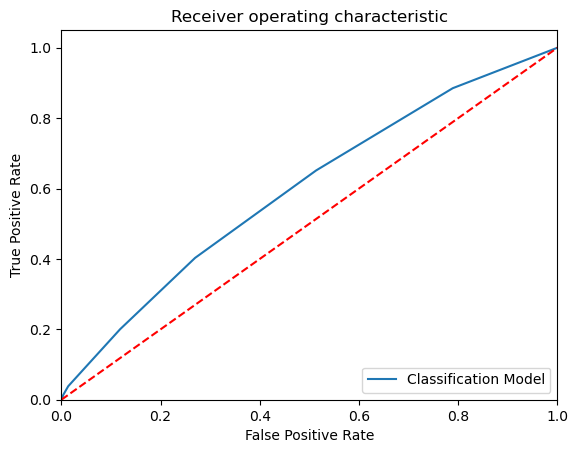

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  15  794]
 [  27 4562]]
Outcome values : 
 15 794 27 4562
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.02      0.04       809
           0       0.85      0.99      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.60      0.51      0.48      5398
weighted avg       0.78      0.85      0.79      5398

Accuracy : 84.8 %
Precision : 35.7 %
Recall : 1.9 %
F1 Score : 0.035
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 50.6 %
MCC : 0.051
roc_auc_score: 0.506


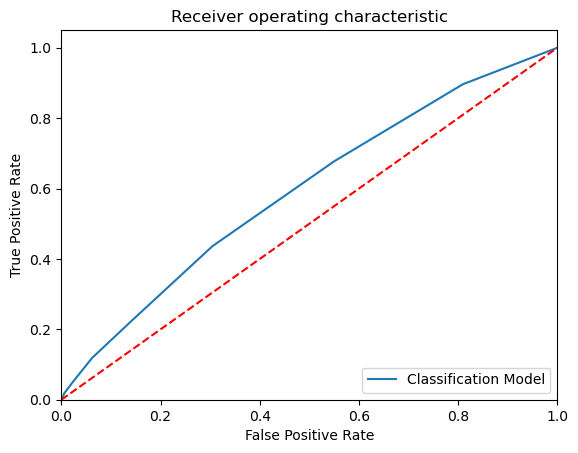

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[   6  803]
 [  14 4575]]
Outcome values : 
 6 803 14 4575
Classification report : 
               precision    recall  f1-score   support

           1       0.30      0.01      0.01       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.58      0.50      0.47      5398
weighted avg       0.77      0.85      0.78      5398

Accuracy : 84.9 %
Precision : 30.0 %
Recall : 0.7 %
F1 Score : 0.014
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 50.2 %
MCC : 0.026
roc_auc_score: 0.502


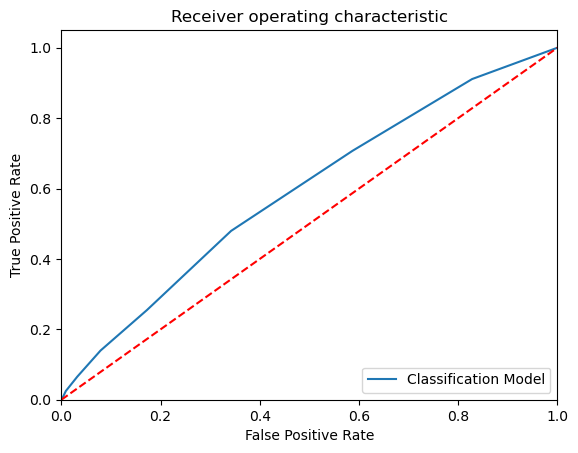

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[   8  801]
 [  20 4569]]
Outcome values : 
 8 801 20 4569
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.01      0.02       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.57      0.50      0.47      5398
weighted avg       0.77      0.85      0.78      5398

Accuracy : 84.8 %
Precision : 28.6 %
Recall : 1.0 %
F1 Score : 0.019
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 50.3 %
MCC : 0.027
roc_auc_score: 0.503


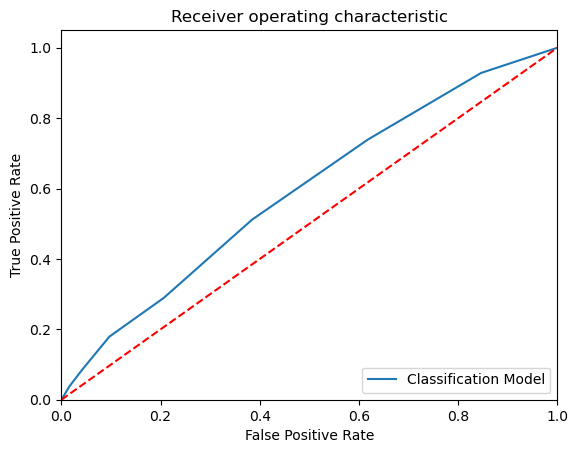

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[   6  803]
 [  10 4579]]
Outcome values : 
 6 803 10 4579
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.01      0.01       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.61      0.50      0.47      5398
weighted avg       0.78      0.85      0.78      5398

Accuracy : 84.9 %
Precision : 37.5 %
Recall : 0.7 %
F1 Score : 0.015
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.2 %
MCC : 0.034
roc_auc_score: 0.503


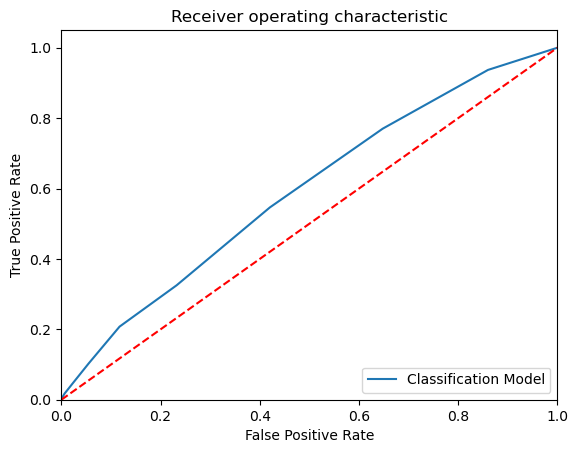

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[   7  802]
 [  15 4574]]
Outcome values : 
 7 802 15 4574
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.01      0.02       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.58      0.50      0.47      5398
weighted avg       0.77      0.85      0.78      5398

Accuracy : 84.9 %
Precision : 31.8 %
Recall : 0.9 %
F1 Score : 0.017
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 50.3 %
MCC : 0.03
roc_auc_score: 0.503


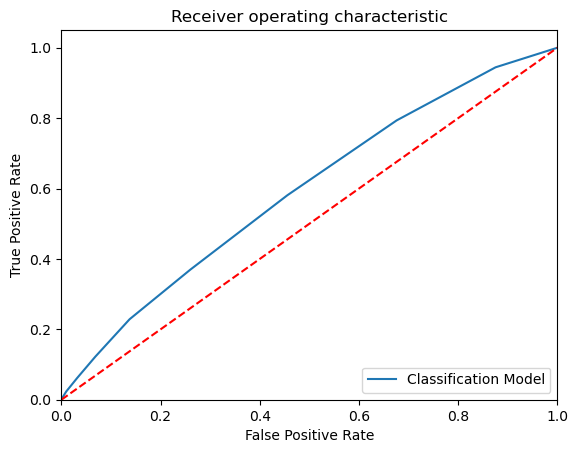

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[   1  808]
 [   5 4584]]
Outcome values : 
 1 808 5 4584
Classification report : 
               precision    recall  f1-score   support

           1       0.17      0.00      0.00       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.51      0.50      0.46      5398
weighted avg       0.75      0.85      0.78      5398

Accuracy : 84.9 %
Precision : 16.7 %
Recall : 0.1 %
F1 Score : 0.002
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
MCC : 0.002
roc_auc_score: 0.5


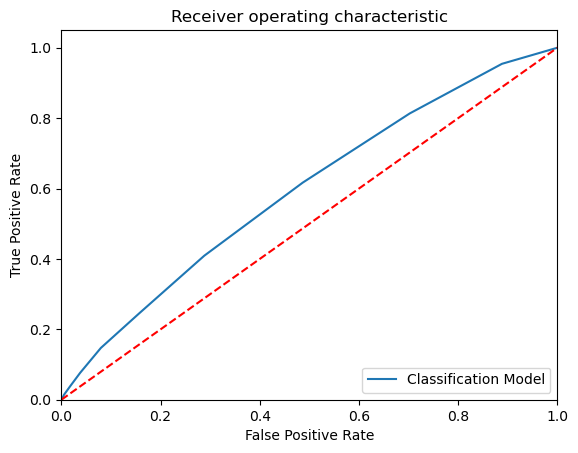

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[   2  807]
 [   9 4580]]
Outcome values : 
 2 807 9 4580
Classification report : 
               precision    recall  f1-score   support

           1       0.18      0.00      0.00       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.52      0.50      0.46      5398
weighted avg       0.75      0.85      0.78      5398

Accuracy : 84.9 %
Precision : 18.2 %
Recall : 0.2 %
F1 Score : 0.005
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.0 %
MCC : 0.004
roc_auc_score: 0.5


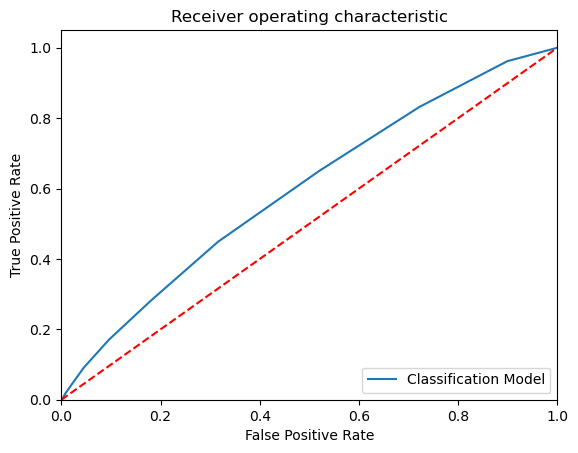

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[   1  808]
 [   3 4586]]
Outcome values : 
 1 808 3 4586
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.00      0.00       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.55      0.50      0.46      5398
weighted avg       0.76      0.85      0.78      5398

Accuracy : 85.0 %
Precision : 25.0 %
Recall : 0.1 %
F1 Score : 0.002
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
MCC : 0.008
roc_auc_score: 0.5


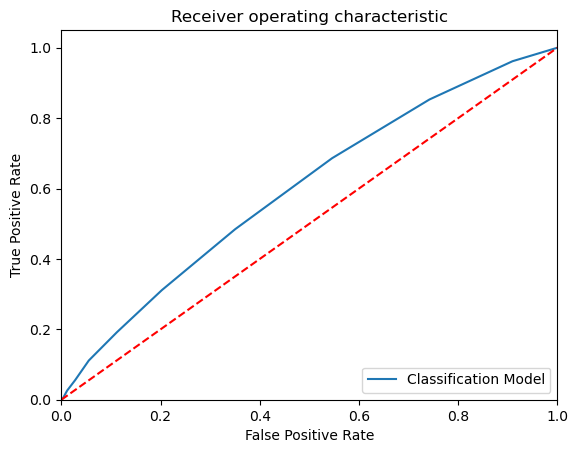

In [46]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [47]:
KNN_Results


,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,181,628,634,3955,0.766,0.222,0.224,0.223,0.862,0.085,0.542788,0.543
1,KNeighborsClassifier(n_neighbors=2),2,46,763,98,4491,0.840,0.319,0.057,0.097,0.979,0.079,0.517752,0.518
2,KNeighborsClassifier(n_neighbors=3),3,99,710,299,4290,0.813,0.249,0.122,0.164,0.935,0.078,0.528609,0.528
3,KNeighborsClassifier(n_neighbors=4),4,23,786,71,4518,0.841,0.245,0.028,0.051,0.985,0.035,0.506479,0.506
4,KNeighborsClassifier(),5,57,752,185,4404,0.826,0.236,0.070,0.108,0.960,0.052,0.515072,0.515
5,KNeighborsClassifier(n_neighbors=6),6,24,785,47,4542,0.846,0.338,0.030,0.055,0.990,0.061,0.509712,0.510
6,KNeighborsClassifier(n_neighbors=7),7,38,771,95,4494,0.840,0.286,0.047,0.081,0.979,0.060,0.513135,0.513
7,KNeighborsClassifier(n_neighbors=8),8,18,791,30,4559,0.848,0.375,0.022,0.042,0.993,0.060,0.507856,0.507
8,KNeighborsClassifier(n_neighbors=9),9,26,783,58,4531,0.844,0.310,0.032,0.058,0.987,0.056,0.509750,0.509
9,KNeighborsClassifier(n_neighbors=10),10,12,797,25,4564,0.848,0.324,0.015,0.028,0.995,0.041,0.504693,0.505


Model Name:  SVM - Linear
Confusion matrix : 
 [[   0  809]
 [   0 4589]]
Outcome values : 
 0 809 0 4589
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.43      0.50      0.46      5398
weighted avg       0.72      0.85      0.78      5398

Accuracy : 85.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


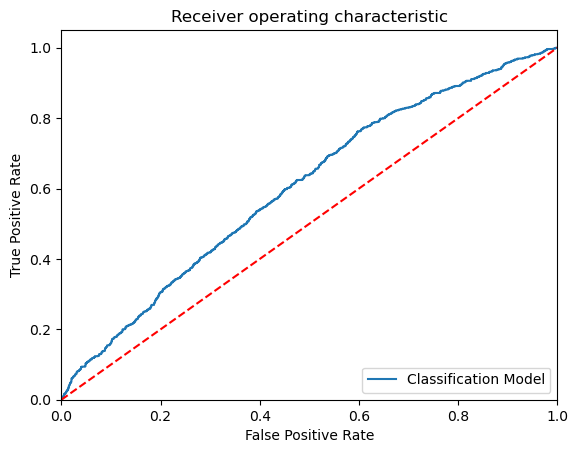

-----------------------------------------------------------------------------------------------------


In [48]:

# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
res = res.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

In [49]:
res

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,809,0,4589,0.85,NaN,0.0,0.0,1.0,NaN,0.5,0.5


Model Name:  SVM - Polynominal
Confusion matrix : 
 [[   0  809]
 [   0 4589]]
Outcome values : 
 0 809 0 4589
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.43      0.50      0.46      5398
weighted avg       0.72      0.85      0.78      5398

Accuracy : 85.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


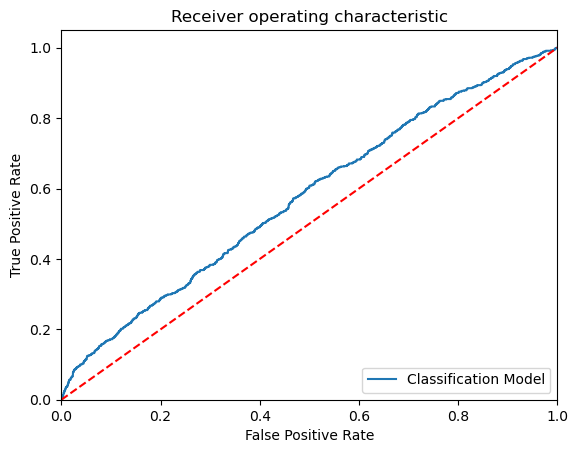

-----------------------------------------------------------------------------------------------------


In [50]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
res = res.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

In [51]:
res

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,809,0,4589,0.85,NaN,0.0,0.0,1.0,NaN,0.5,0.5
1,SVM - Polynominal,0,809,0,4589,0.85,NaN,0.0,0.0,1.0,NaN,0.5,0.5


Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 502  307]
 [1695 2894]]
Outcome values : 
 502 307 1695 2894
Classification report : 
               precision    recall  f1-score   support

           1       0.23      0.62      0.33       809
           0       0.90      0.63      0.74      4589

    accuracy                           0.63      5398
   macro avg       0.57      0.63      0.54      5398
weighted avg       0.80      0.63      0.68      5398

Accuracy : 62.9 %
Precision : 22.8 %
Recall : 62.1 %
F1 Score : 0.334
Specificity or True Negative Rate : 63.1 %
Balanced Accuracy : 62.6 %
MCC : 0.182
roc_auc_score: 0.626


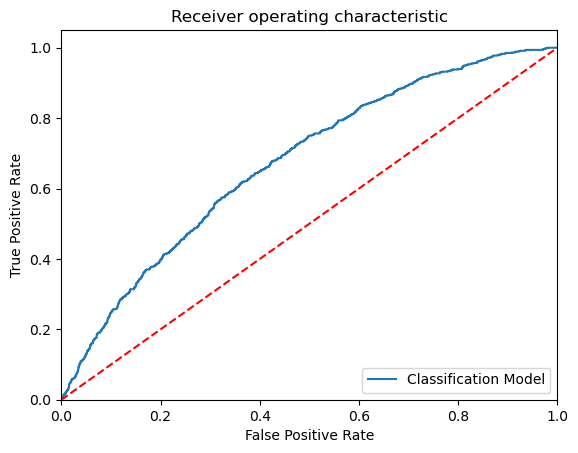

-----------------------------------------------------------------------------------------------------


In [52]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
res = res.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

In [53]:
res

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,809,0,4589,0.850,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynominal,0,809,0,4589,0.850,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
2,SVM - Gaussian,502,307,1695,2894,0.629,0.228,0.621,0.334,0.631,0.182,0.625579,0.626


Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 461  348]
 [2027 2562]]
Outcome values : 
 461 348 2027 2562
Classification report : 
               precision    recall  f1-score   support

           1       0.19      0.57      0.28       809
           0       0.88      0.56      0.68      4589

    accuracy                           0.56      5398
   macro avg       0.53      0.56      0.48      5398
weighted avg       0.78      0.56      0.62      5398

Accuracy : 56.0 %
Precision : 18.5 %
Recall : 57.0 %
F1 Score : 0.28
Specificity or True Negative Rate : 55.8 %
Balanced Accuracy : 56.4 %
MCC : 0.092
roc_auc_score: 0.564


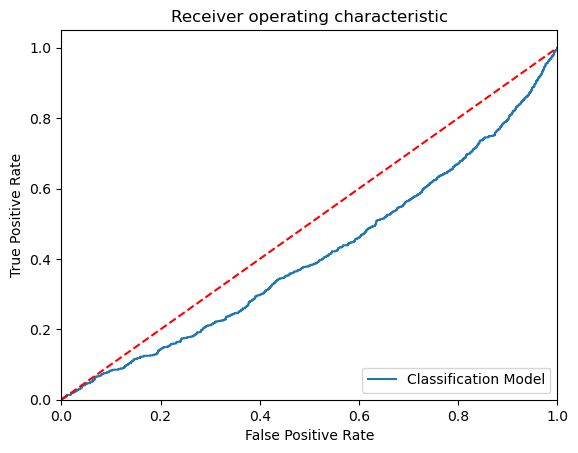

-----------------------------------------------------------------------------------------------------


In [54]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
res = res.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [55]:
res

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,809,0,4589,0.850,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynominal,0,809,0,4589,0.850,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
2,SVM - Gaussian,502,307,1695,2894,0.629,0.228,0.621,0.334,0.631,0.182,0.625579,0.626
3,SVM - Sigmoid,461,348,2027,2562,0.560,0.185,0.570,0.280,0.558,0.092,0.564065,0.564


# Compare

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  22  787]
 [  24 4565]]
Outcome values : 
 22 787 24 4565
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.03      0.05       809
           0       0.85      0.99      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.67      0.51      0.48      5398
weighted avg       0.80      0.85      0.79      5398

Accuracy : 85.0 %
Precision : 47.8 %
Recall : 2.7 %
F1 Score : 0.051
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 51.1 %
MCC : 0.085
roc_auc_score: 0.511


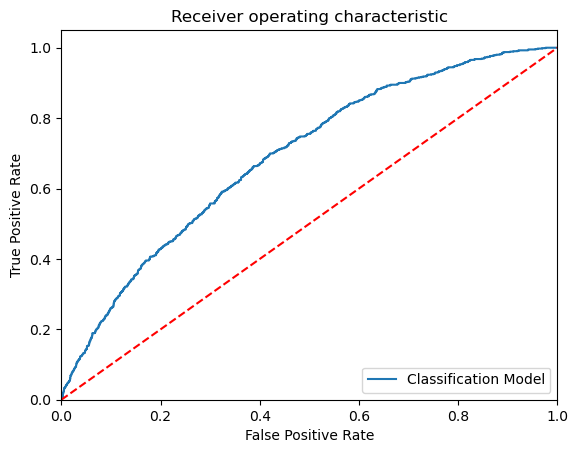

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 241  568]
 [ 772 3817]]
Outcome values : 
 241 568 772 3817
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.30      0.26       809
           0       0.87      0.83      0.85      4589

    accuracy                           0.75      5398
   macro avg       0.55      0.56      0.56      5398
weighted avg       0.78      0.75      0.76      5398

Accuracy : 75.2 %
Precision : 23.8 %
Recall : 29.8 %
F1 Score : 0.265
Specificity or True Negative Rate : 83.2 %
Balanced Accuracy : 56.5 %
MCC : 0.119
roc_auc_score: 0.565


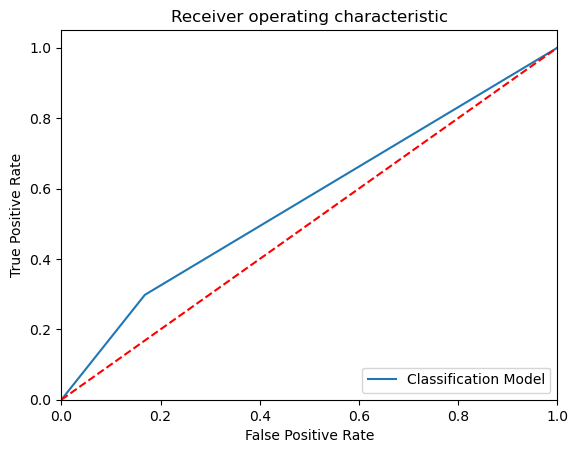

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[   9  800]
 [   8 4581]]
Outcome values : 
 9 800 8 4581
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.01      0.02       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.69      0.50      0.47      5398
weighted avg       0.80      0.85      0.78      5398

Accuracy : 85.0 %
Precision : 52.9 %
Recall : 1.1 %
F1 Score : 0.022
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.4 %
MCC : 0.06
roc_auc_score: 0.505


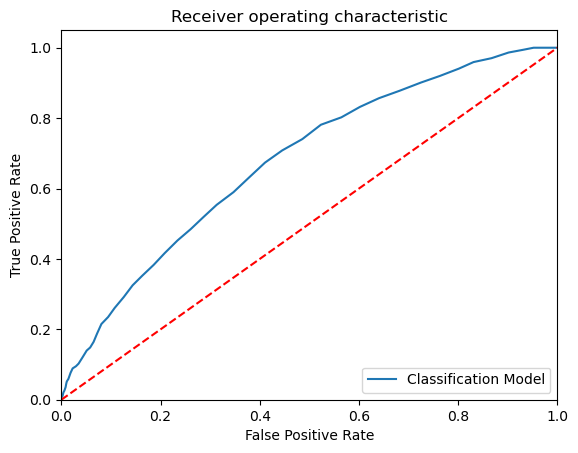

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  10  799]
 [  10 4579]]
Outcome values : 
 10 799 10 4579
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.01      0.02       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.68      0.51      0.47      5398
weighted avg       0.80      0.85      0.78      5398

Accuracy : 85.0 %
Precision : 50.0 %
Recall : 1.2 %
F1 Score : 0.024
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.5 %
MCC : 0.06
roc_auc_score: 0.505


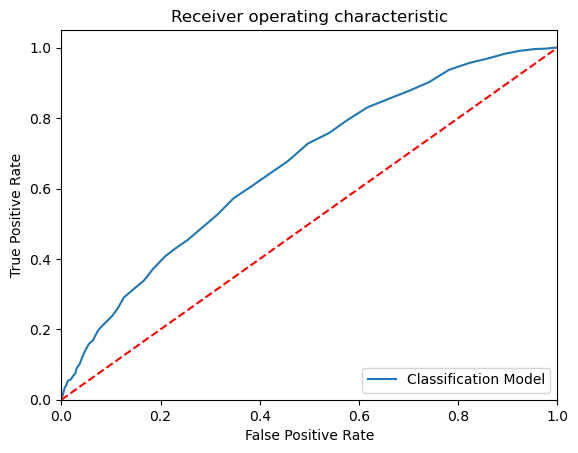

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[   1  808]
 [   3 4586]]
Outcome values : 
 1 808 3 4586
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.00      0.00       809
           0       0.85      1.00      0.92      4589

    accuracy                           0.85      5398
   macro avg       0.55      0.50      0.46      5398
weighted avg       0.76      0.85      0.78      5398

Accuracy : 85.0 %
Precision : 25.0 %
Recall : 0.1 %
F1 Score : 0.002
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
MCC : 0.008
roc_auc_score: 0.5


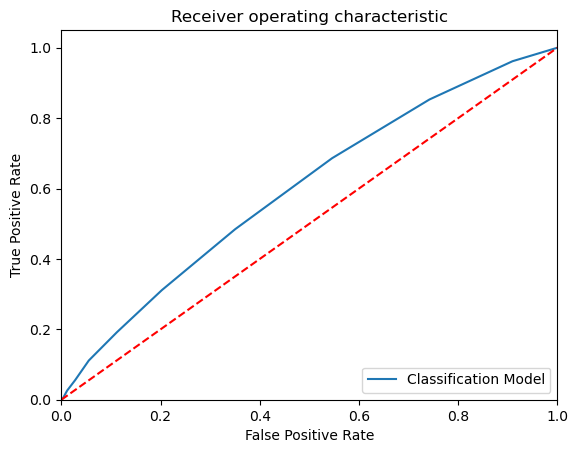

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[ 502  307]
 [1695 2894]]
Outcome values : 
 502 307 1695 2894
Classification report : 
               precision    recall  f1-score   support

           1       0.23      0.62      0.33       809
           0       0.90      0.63      0.74      4589

    accuracy                           0.63      5398
   macro avg       0.57      0.63      0.54      5398
weighted avg       0.80      0.63      0.68      5398

Accuracy : 62.9 %
Precision : 22.8 %
Recall : 62.1 %
F1 Score : 0.334
Specificity or True Negative Rate : 63.1 %
Balanced Accuracy : 62.6 %
MCC : 0.182
roc_auc_score: 0.626


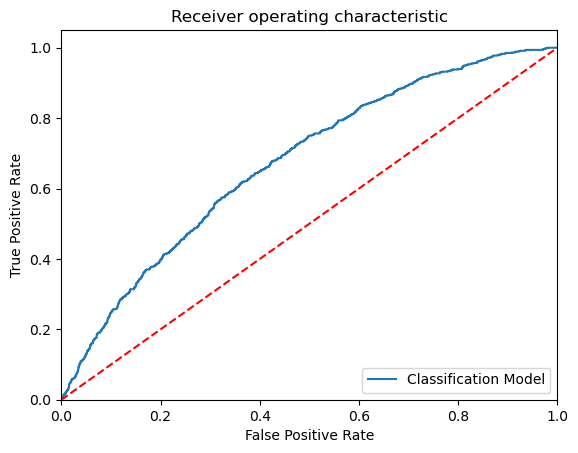

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 105  704]
 [ 206 4383]]
Outcome values : 
 105 704 206 4383
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.13      0.19       809
           0       0.86      0.96      0.91      4589

    accuracy                           0.83      5398
   macro avg       0.60      0.54      0.55      5398
weighted avg       0.78      0.83      0.80      5398

Accuracy : 83.1 %
Precision : 33.8 %
Recall : 13.0 %
F1 Score : 0.188
Specificity or True Negative Rate : 95.5 %
Balanced Accuracy : 54.2 %
MCC : 0.13
roc_auc_score: 0.542


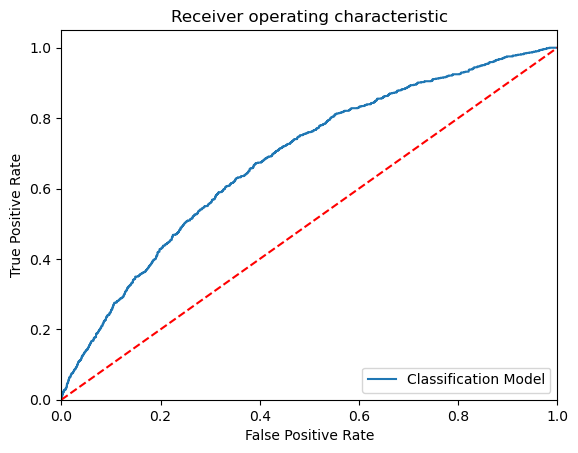

-----------------------------------------------------------------------------------------------------


In [56]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=20)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM,ModelGNB]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    res = res.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------


In [57]:
res

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,809,0,4589,0.850,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynominal,0,809,0,4589,0.850,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
2,SVM - Gaussian,502,307,1695,2894,0.629,0.228,0.621,0.334,0.631,0.182,0.625579,0.626
3,SVM - Sigmoid,461,348,2027,2562,0.560,0.185,0.570,0.280,0.558,0.092,0.564065,0.564
4,LogisticRegression(),22,787,24,4565,0.850,0.478,0.027,0.051,0.995,0.085,0.510982,0.511
5,DecisionTreeClassifier(),241,568,772,3817,0.752,0.238,0.298,0.265,0.832,0.119,0.564835,0.565
6,"(DecisionTreeClassifier(max_features='sqrt', r...",9,800,8,4581,0.850,0.529,0.011,0.022,0.998,0.060,0.504691,0.504
7,"(ExtraTreeClassifier(random_state=1245280037),...",10,799,10,4579,0.850,0.500,0.012,0.024,0.998,0.060,0.505091,0.505
8,KNeighborsClassifier(n_neighbors=20),1,808,3,4586,0.850,0.250,0.001,0.002,0.999,0.008,0.500291,0.500
9,"SVC(class_weight='balanced', probability=True,...",502,307,1695,2894,0.629,0.228,0.621,0.334,0.631,0.182,0.625579,0.626


In [58]:
y_predET=ModelET.predict(x_test)

In [59]:
results=pd.DataFrame({'fraud_A':y_test,'fraud_P':y_predET})

resultsfinal=pred_bk.merge(results,left_index=True,right_index=True)

resultsfinal.sample(10)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,fraud_A,fraud_P
16455,27445,35,F,1.0,73,35546,1,1,Own,85018,8/1/2016,Monday,Local,0,0.0,24,Broker,0,3134.917524,2.0,Compact,30568.699650,gray,36146.082910,0,0,0
14179,23593,48,F,1.0,61,38713,1,1,Rent,80045,5/25/2016,Wednesday,Highway,0,1.0,80,Broker,0,4353.122605,2.0,Large,35934.663430,gray,14858.173000,1,1,0
17464,29134,73,F,1.0,62,42894,1,0,Rent,50009,1/25/2015,Sunday,Highway,0,1.0,71,Broker,1,9015.019687,3.0,Large,57580.542620,red,19865.766420,0,0,0
3975,6624,33,M,1.0,85,34953,1,1,Rent,15038,6/28/2015,Sunday,Parking Lot,0,1.0,100,Broker,0,8881.099255,5.0,Large,23575.918330,white,80020.035830,0,0,0
17870,29767,60,F,1.0,82,40965,0,0,Own,20158,10/12/2016,Wednesday,Local,0,0.0,0,Phone,0,1731.799042,3.0,Large,15889.554900,white,9712.903061,0,0,0
8283,13752,42,M,1.0,70,37399,1,0,Own,85014,11/4/2016,Friday,Parking Lot,0,0.0,81,Phone,0,4092.880733,3.0,Large,11564.171910,red,37728.016130,0,0,0
17178,28643,43,F,1.0,78,37594,1,1,Rent,15027,6/23/2015,Tuesday,Highway,0,1.0,51,Broker,1,7753.537041,6.0,Medium,35437.988080,black,14712.287450,0,0,0
16896,28173,41,F,0.0,85,37125,1,1,Own,15012,8/25/2016,Thursday,Parking Lot,0,0.0,28,Broker,1,11038.192930,2.0,Medium,7118.554576,other,19220.066550,0,0,0
13334,22202,44,M,1.0,52,37836,0,0,Own,20152,2/16/2016,Tuesday,Local,0,1.0,95,Broker,0,7476.261242,4.0,Large,17667.756480,other,45929.609860,0,0,0
3469,5781,44,F,1.0,77,37844,1,1,Own,85003,9/28/2016,Wednesday,Parking Lot,0,0.0,25,Broker,0,5284.616306,6.0,Large,21112.062660,white,25435.826030,0,0,0


# Validation

In [61]:
test= pd.read_csv(r'C:\Users\nayak\OneDrive\Desktop\Intership Project\test_2021.csv')
test_bk = test.copy()
test.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,2,39,M,1.0,73,36633,1,0,Own,50048,8/12/2016,Friday,Highway,0,0.0,25,Phone,0,5196.552552,8.0,Large,24360.59273,silver,26633.27819
1,9,56,M,1.0,63,40252,1,1,Own,85068,1/2/2015,Friday,Highway,0,1.0,50,Broker,1,7381.165248,6.0,Large,39710.42665,other,15875.34874
2,11,39,F,0.0,75,36634,1,1,Own,20115,1/12/2016,Tuesday,Parking Lot,0,0.0,98,Broker,1,5612.123938,7.0,Medium,50327.56618,silver,21365.05932
3,13,33,M,1.0,72,34960,0,1,Own,50006,10/18/2015,Sunday,Local,0,1.0,45,Phone,0,7957.267641,2.0,Medium,23457.35282,black,26707.46021
4,14,24,F,1.0,70,31776,1,1,Rent,20122,9/4/2016,Sunday,Local,0,1.0,11,Online,0,6232.195932,1.0,Medium,18238.39202,silver,22949.73744


In [62]:
test.isnull().sum()

claim_number                0
age_of_driver               0
gender                      0
marital_status              2
safty_rating                0
annual_income               0
high_education_ind          0
address_change_ind          0
living_status               0
zip_code                    0
claim_date                  0
claim_day_of_week           0
accident_site               0
past_num_of_claims          0
witness_present_ind        88
liab_prct                   0
channel                     0
policy_report_filed_ind     0
claim_est_payout           14
age_of_vehicle              3
vehicle_category            0
vehicle_price               0
vehicle_color               0
vehicle_weight              0
dtype: int64

In [63]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
test['witness_present_ind']=si.fit_transform(test[['witness_present_ind']])
test['marital_status']=si.fit_transform(test[['marital_status']])
test['marital_status']=test['marital_status'].astype(int)
test['witness_present_ind']=test['witness_present_ind'].astype(int)

In [64]:
#fddata['marital_status']= fddata['marital_status'].fillna(1)
from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors=2)
test['claim_est_payout'] = ki.fit_transform(test[['claim_est_payout']])
test['claim_est_payout']=test['claim_est_payout'].astype(int)

In [65]:
from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors=2)
test['age_of_vehicle'] = ki.fit_transform(test[['age_of_vehicle']])
test['age_of_vehicle']=test['age_of_vehicle'].astype(int)

In [66]:
test[test.duplicated()]

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight


In [67]:
test['gender'].value_counts()

M    6216
F    5786
Name: gender, dtype: int64

In [68]:
test['gender']= test['gender'].replace(['M','F'],[0,1])

In [69]:
test['living_status'].value_counts()

Own     6639
Rent    5363
Name: living_status, dtype: int64

In [70]:
test['living_status']= test['living_status'].replace(['Own','Rent'],[0,1])

In [71]:
test['accident_site'].value_counts()

Local          5933
Parking Lot    3578
Highway        2491
Name: accident_site, dtype: int64

In [72]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

test['accident_site']=LE.fit_transform(test['accident_site'])

In [73]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

test['channel']=LE.fit_transform(test['channel'])

In [74]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

test['vehicle_category']=LE.fit_transform(test['vehicle_category'])

In [75]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

test['vehicle_color']=LE.fit_transform(test['vehicle_color'])

In [76]:
test['claim_day_of_week']=test['claim_day_of_week'].map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})


In [77]:
test

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,2,39,0,1,73,36633,1,0,0,50048,8/12/2016,4,0,0,0,25,2,0,5196,8,1,24360.592730,5,26633.27819
1,9,56,0,1,63,40252,1,1,0,85068,1/2/2015,4,0,0,1,50,0,1,7381,6,1,39710.426650,3,15875.34874
2,11,39,1,0,75,36634,1,1,0,20115,1/12/2016,1,2,0,0,98,0,1,5612,7,2,50327.566180,5,21365.05932
3,13,33,0,1,72,34960,0,1,0,50006,10/18/2015,6,1,0,1,45,2,0,7957,2,2,23457.352820,0,26707.46021
4,14,24,1,1,70,31776,1,1,1,20122,9/4/2016,6,1,0,1,11,1,0,6232,1,2,18238.392020,5,22949.73744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11997,29990,64,1,1,87,41566,0,1,0,20142,7/19/2015,6,1,1,1,50,0,1,7475,3,1,20231.723630,3,27015.87981
11998,29992,34,1,1,70,35256,1,0,0,20109,3/7/2015,5,2,1,0,28,0,1,3838,7,0,21900.031920,0,16122.91954
11999,29994,45,0,1,61,38072,1,0,1,15044,6/23/2015,1,1,1,0,94,0,1,5236,7,2,8291.858346,4,26825.84418
12000,29995,28,1,0,92,33322,1,0,0,85067,4/14/2015,1,1,0,1,39,1,1,3885,5,0,16168.298850,1,14855.54007


In [78]:
test['age_of_driver'].value_counts()

45     423
43     408
41     392
40     392
44     391
      ... 
249      1
278      1
96       1
180      1
123      1
Name: age_of_driver, Length: 81, dtype: int64

In [79]:
data1 = psql.sqldf("select * from test where age_of_driver>99")
data1

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,52,180,1,1,87,51918,1,1,0,20101,6/13/2016,0,1,0,0,11,0,1,2678,5,2,9223.388197,0,26935.00725
1,7999,278,1,1,76,56275,1,0,1,80015,10/5/2016,2,1,0,0,53,0,1,10728,5,1,7995.461039,0,19242.95321
2,9002,249,0,1,94,55189,0,0,0,80040,11/19/2016,5,1,0,1,93,0,0,6366,5,0,10785.663760,2,35005.87268
3,9773,101,0,1,42,46159,0,0,0,85023,8/16/2016,1,2,3,0,81,0,1,4168,8,1,17169.837670,5,12952.06083
4,16204,100,0,1,78,46048,1,0,0,15035,10/11/2016,1,1,0,0,27,0,1,5486,5,0,31033.818160,5,31416.06623
5,26360,123,1,1,74,48136,1,0,0,20132,11/22/2016,1,1,0,0,48,1,0,1070,2,1,30392.900240,5,19209.76201


In [80]:
test.drop(test.index[(test['age_of_driver']== 180)],axis=0,inplace=True)
test.drop(test.index[(test['age_of_driver']== 278)],axis=0,inplace=True)
test.drop(test.index[(test['age_of_driver']== 249)],axis=0,inplace=True)
test.drop(test.index[(test['age_of_driver']== 101)],axis=0,inplace=True)
test.drop(test.index[(test['age_of_driver']== 100)],axis=0,inplace=True)
test.drop(test.index[(test['age_of_driver']== 123)],axis=0,inplace=True)

In [81]:
del test['claim_number']
del test['zip_code']
del test['claim_date']

In [82]:
test

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,39,0,1,73,36633,1,0,0,4,0,0,0,25,2,0,5196,8,1,24360.592730,5,26633.27819
1,56,0,1,63,40252,1,1,0,4,0,0,1,50,0,1,7381,6,1,39710.426650,3,15875.34874
2,39,1,0,75,36634,1,1,0,1,2,0,0,98,0,1,5612,7,2,50327.566180,5,21365.05932
3,33,0,1,72,34960,0,1,0,6,1,0,1,45,2,0,7957,2,2,23457.352820,0,26707.46021
4,24,1,1,70,31776,1,1,1,6,1,0,1,11,1,0,6232,1,2,18238.392020,5,22949.73744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11997,64,1,1,87,41566,0,1,0,6,1,1,1,50,0,1,7475,3,1,20231.723630,3,27015.87981
11998,34,1,1,70,35256,1,0,0,5,2,1,0,28,0,1,3838,7,0,21900.031920,0,16122.91954
11999,45,0,1,61,38072,1,0,1,1,1,1,0,94,0,1,5236,7,2,8291.858346,4,26825.84418
12000,28,1,0,92,33322,1,0,0,1,1,0,1,39,1,1,3885,5,0,16168.298850,1,14855.54007


In [83]:
y_predET1=ModelET.predict(test)

In [84]:
results=pd.DataFrame({'fraud_P':y_predET1})

resultsfinal1=test_bk.merge(results,left_index=True,right_index=True)

resultsfinal1.sample(10)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud_P
10438,26112,32,F,0.0,38,34663,1,1,Own,15009,12/24/2015,Thursday,Local,0,1.0,91,Online,1,8546.303049,6.0,Compact,25276.89817,blue,17268.510840,0
9027,22608,41,M,0.0,65,37135,0,0,Rent,85073,4/3/2015,Friday,Local,0,0.0,67,Broker,1,2547.687537,6.0,Large,51995.73768,white,22564.181860,0
2380,5954,31,M,1.0,82,34329,1,1,Own,85072,12/16/2015,Wednesday,Local,0,1.0,42,Phone,0,3123.158703,6.0,Compact,22692.56642,white,7309.399665,0
10917,27295,67,F,1.0,61,42046,0,1,Own,80026,8/15/2016,Monday,Local,4,1.0,36,Broker,1,9917.129168,7.0,Medium,45338.67613,black,31673.960080,0
5814,14610,25,M,1.0,66,32197,1,0,Rent,80036,6/4/2015,Thursday,Local,2,0.0,23,Online,0,9409.119726,4.0,Compact,14399.99067,white,23488.180650,0
4691,11832,35,M,0.0,80,35549,0,1,Own,50031,10/15/2015,Thursday,Parking Lot,0,0.0,3,Broker,1,5721.572038,5.0,Compact,39139.09534,red,12664.126680,0
115,291,46,F,1.0,72,38287,0,0,Own,80021,8/2/2016,Tuesday,Parking Lot,0,0.0,98,Broker,0,5868.137258,3.0,Compact,34776.22171,white,18491.828600,0
2448,6108,40,F,0.0,55,36888,1,1,Own,15012,4/21/2015,Tuesday,Local,0,0.0,21,Phone,1,3268.162574,3.0,Compact,21900.46002,other,13146.072130,0
2236,5569,35,F,0.0,82,35567,1,1,Rent,15025,4/18/2016,Monday,Local,0,0.0,97,Broker,0,5862.248333,5.0,Medium,19372.25828,silver,45761.738150,0
8390,21038,48,F,1.0,66,38721,1,1,Own,15001,8/31/2015,Monday,Local,0,0.0,21,Phone,1,5119.291056,4.0,Compact,11149.60503,other,25547.459100,0


In [85]:
resultsfinal1['fraud_P'].value_counts()

0    11777
1      219
Name: fraud_P, dtype: int64